
# Generate tree of life for phylums
* Date: July 25, 2019
* location: /pylon5/mc5fr5p/hbagheri/09_Hadoop/seqRepIDTaxListOUTPUT


### Reference of phylums:  "A Higher Level Classification of All Living Organisms", PLOS' 2015

* List of phyla from this paper, see Table 2

* https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0119248#sec003


## Steps on Bridges generate the tree



#### we used ETE toolkit to get lineage and generate tree and translate taxonomy id to taxa name.

**TODO: python file here**


#### information about this analysis all are in the ```/Notebook_Hamid/phyl``` folder


### list of tax ids that we want to create tree with 95% representative sequences and show the frequencies

```
s: Sequence = input;
clstrOut : output collection [string] of string;

getTaxList := function(seq: Sequence):string {
  tax_names := "";
  tax_ids :="";
 
  foreach(i:int; def(s.annotation[i])){
          if (s.annotation[i].tax_name !=""){
            tax_names = tax_names + s.annotation[i].tax_name + "$";     
            tax_ids = tax_ids + s.annotation[i].tax_id + " ";   
 
          }
  }
 return tax_ids + " == $" + tax_names;
};

foreach(i:int; def(s.cluster[i]))
 if (s.cluster[i].similarity==95 && s.cluster[i].representative){
  clstrOut [s.seqid] <<  getTaxList(s);

}


```

* we have 744237 tax ids in the 95% similarity
```
[hbagheri@login018 tax95]$ wc -l uniqtax95
744237 uniqtax95
```


### "Proposed hierarchical classification from superkingdom to order", PLOS' 2015

* we get list of tax ids that we are interested in to calculate the number of tax ids in their subtree, i.e, they are basically list of phylums


```
Crenarchaeota
Euryarchaeota
Acidobacteria
Aquificae
Armatimonadetes
Bacteroidetes
Caldiserica
Chlamydiae
Chlorobi
Chrysiogenetes
Cyanobacteria
Deferribacteres
Deinococcus-Thermus 
Dictyoglomi
Elusimicrobia
Fibrobacteres
Fusobacteria
Gemmatimonadetes
Lentisphaerae
Nitrospira
Planctomycetes
Proteobacteria
Spirochaetae
Synergistetes
Thermodesulfobacteria
Thermotogae
Verrucomicrobia
Actinobacteria
Chloroflexi 
Firmicutes
Tenericutes
Euglenozoa
Loukozoa
Metamonada
Percolozoa
Amoebozoa
Choanozoa  
Microsporidia 
Sulcozoa
N.N.
Cryptista
Haptophyta
Heliozoa
Ciliophora
Miozoa
Bigyra
Ochrophyta 
Pseudofungi 
Cercozoa
Retaria
Ascomycota
Basidiomycota
Chytridiomycota
Glomeromycota
Zygomycota
Glaucophyta
Rhodophyta
Chlorophyta
Charophyta
Anthocerotophyta
Bryophyta
Marchantiophyta
Tracheophyta
Cnidaria
Ctenophora
Placozoa
Porifera
Chaetognatha
Orthonectida
Rhombozoa
Arthropoda
Kinorhyncha
Loricifera
Nematoda
Nematomorpha
Onychophora
Priapula 
Tardigrada
Acanthocephala
Annelida
Brachiopoda
Bryozoa
Cycliophora
Entoprocta
Gastrotricha
Gnathostomulida
Micrognathozoa
Mollusca
Nemertea
Phoronida
Platyhelminthes
Rotifera
Sipuncula
Chordata
Echinodermata
Hemichordata
Xenacoelomorpha

```

#### Get list of Taxids from tax name
* NCBI taxonomy name/id : https://www.ncbi.nlm.nih.gov/Taxonomy/TaxIdentifier/tax_identifier.cgi



* we get list of all subtree tax ids for those interested tax ids , i.e. phylums
  * we needed to submit a job called join.sub on XSEDE to join these 2 files. It takes time. (Run time 00:48:50)

    ```
    [hbagheri@login018 seqIDTaxlist]$ cat join.sub
    #!/bin/bash

    #BATCH -J freq
    #SBATCH -o freq.o%j
    #SBATCH -p RM
    #SBATCH -N 1
    #SBATCH -n 28
    #SBATCH -t 48:00:00
    #SBATCH --mail-user=hbagheri@iastate.edu
    #SBATCH --mail-type=begin
    #SBATCH --mail-type=end
    #SBATCH --error=freq.err
    #SBATCH --output=freq.out

    cd /pylon5/mc5fr5p/hbagheri/09_Hadoop/seqIDTaxlist/
    grep -Fwf interested_taxids outLineage_taxids  > interested_list

    ```

### post processing:

```
# get the 3rd column which is the primary taxonomic assignment for 95%
grep "^clstrOut\[95\]" part-r-00000 | awk '{print $3}' part-r-00000 > tmp3column
# then we need to sort that file and calculate the counts
# this gives the tax Frequencies
sort tmp3column | uniq -c > taxFreq
# this is sample output

# we need to switch the columns
awk '{print $2, $1}' taxFreq > taxFreq2
```

### Generate the tree:
* run ```python phyl_count.py taxFreq2 interested_list``` following is the details and steps of this program:
  * so the interested_list file is the output of the sbatch job which gives the tax id and all available tax ids in the tree of life
  * then we used the python script to check how many of this tax ids in the subtree are actually available in the NR database
    * pyhton file is ```phyl_count.py``` and we call the method ```get_taxa_info(taxaDicFile, intereseted_taxids_file ) ```

  * once we have the taxid and count we want to get the tax name for this list. We need this for update the tree which is a phylip format. to do so we call this method in the python script ```def get_taxname(file)```
  * finally we annotate the tree. We call the ```def buil_tree(phylipFile, tax_file)``` function






### taxid, tax_name, and frequencies that we used to annotate the tree:

```

TODO


```




## tree of life online:
#### https://icytree.org/

#### NCBI
* https://www.ncbi.nlm.nih.gov/projects/treeview/tv.html?appname=ncbi_tviewer&renderer=radial&openuploaddialog
* [link to the ncbi version of the tree](https://www.ncbi.nlm.nih.gov/projects/treeview/ncfetch.cgi?key=NCID_1_18026861_130.14.22.93_9105_1560466319_880881147_0MetA0___S_NC_TreeView_PROD_F_1&fmt=application/pdf&filename=undefined.pdf&inline=true)

#### ETE3 online:
* The nwk file format code be paste here: http://etetoolkit.org/treeview/


#### software to generate tree is FigTree
 * before that get the phylip format and annotate it with tax count
 * upload it to the itol website: https://itol.embl.de/
   * export the nwk format from itol
   * open it with FigTree  




## Post-processing on the Boa<sub>g</sub> output

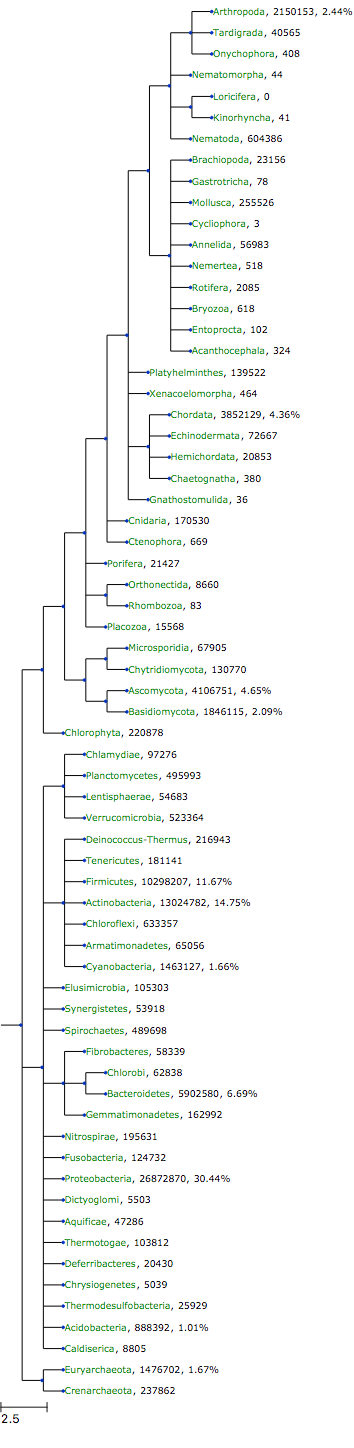

In [2]:

from ete3 import NCBITaxa, PhyloTree, Tree, faces, AttrFace, TreeStyle, TextFace

ncbi = NCBITaxa()
taxlist =list()
taxDic = dict()

def layout(node):
    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("sci_name",  fgcolor="#009000")
    nameFace2 = faces.AttrFace("rank",  fgcolor="#009000") #fsize=20,


    rank = 100
    # add rank, frequency, and percentage to the nodes
    if node.is_leaf():
        #faces.add_face_to_node(nameFace, node, column=0)
        #faces.add_face_to_node(nameFace2, node, column=1)

        node.add_face(nameFace, column=2)
        node.add_face(TextFace(", "), column=3)
        node.add_face(TextFace(taxDic[int(node.name)]), column=4)
        

        #this gives the percentages of protein sequences for each clade
        percentages = 100 * float(taxDic[int(node.name)])/float(88276733) 
        
        if percentages < 1: 
            node.add_face(TextFace(" "), column=5)
            node.add_face(TextFace( " " ), column=6)
        else:
            node.add_face(TextFace(", "), column=5)
            node.add_face(TextFace(str(round(percentages, 2)) + "%" ), column=6)



# interested_taxids is the output of previous step that is done on Bridges
with open('interested_taxids', "r") as f:
    for line in f:
        taxid = line.split()[0]
        seq_count = line.split()[1]

        rank = ncbi.get_rank([int(taxid)])

        # we are  interested in phylums
        if rank[int(taxid)]=='phylum':
            taxlist.append(int(taxid))
            taxDic [int(taxid)] = int(seq_count)


tree = ncbi.get_topology(taxlist, intermediate_nodes=False)
tmp_tree2 = tree.get_ascii(attributes=["sci_name", "rank"])

# print(taxlist)
# print(tmp_tree2)

# print (tree.get_ascii(attributes=["sci_name", "rank", "name"], show_internal=False))


ts = TreeStyle()
ts.show_leaf_name = False
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout

tree.render("%%inline", w=100, units="mm", tree_style=ts)



